# Lotka-Volterra toy model

The [LotkaVolterraModel](http://pints.readthedocs.io/en/latest/toy/lotka_volterra_model.html) describes the relationship between two interacting species, where one preys on the other. A good description of its history and interpretation can be found on [Wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).

The model has 2 states $x$ and $y$, where $x$ represents a population of prey, and $y$ represents a population of predators.
It is described by the ODEs:

$$ \frac{dx}{dt} = ax - bxy $$

and

$$ \frac{dy}{dt} = -cy + dxy $$

where $a, b, c$, and $d$ are the four model parameters.

In [1]:
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

print('Outputs: ' + str(model.n_outputs()))
print('Parameters: ' + str(model.n_parameters()))

Outputs: 2
Parameters: 4


The model comes pre-packaged with lynx-hare pelt count data collected by the Hudson's
Bay Company in Canada in the early twentieth century, which is taken
from [1]. The data given here corresponds to annual observations
taken from 1900-1920 (inclusive). We now plot this data.

[1] Howard, P. (2009). Modeling basics. Lecture Notes for Math 442,
           Texas A&M University

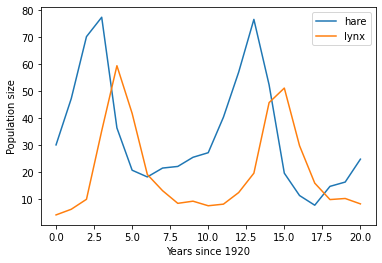

In [2]:
times = model.suggested_times()
values = model.suggested_values()

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('Years since 1920')
plt.ylabel('Population size')
plt.plot(times, values)
plt.legend(['hare', 'lynx'])
plt.show()

In this set-up, the first state represents the prey, and the second the predators.
When there is no prey, the predators begin to die out, which allows the prey population to recover.

To show the cyclical nature more clearly, these two populations are often plotted against each other:

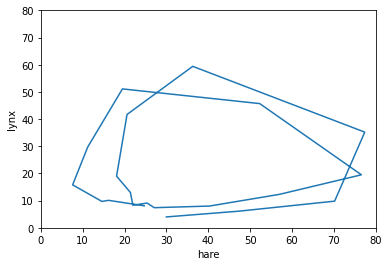

In [3]:
plt.figure()
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('hare')
plt.ylabel('lynx')
plt.plot(values[:, 0], values[:, 1])
plt.show()

We now use PINTS to fit the Lotka-Volterra model (with fixed initial conditions $[x,y]=[30, 4]$) to the pelts data on lynxs and hares. Previous work has showed that a multiplicative noise model is more appropriate to fit these data [2]. As such, we fit the model to the log of the series.

[2] Predator-Prey Population Dynamics: the Lotka-Volterra model in Stan. Carpenter, B. https://mc-stan.org/users/documentation/case-studies/lotka-volterra-predator-prey.html

In [4]:
import numpy as np

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, np.log(values))

# Create a log posterior
log_prior_theta = pints.UniformLogPrior(lower_or_boundaries=0, upper=2)
log_prior_sigma = pints.GaussianLogPrior(mean=0, sd=3)
log_prior = pints.ComposedLogPrior(log_prior_theta, log_prior_theta, log_prior_theta, log_prior_theta,
                                   log_prior_sigma, log_prior_sigma)
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[0.43, 0.16, 0.9, 0.27, 0.28, 0.26]] * 4
mcmc = pints.MCMCController(log_posterior, 4, x0)
mcmc.set_max_iterations(4000)

print('Running')
timer = pints.Timer()
chains = mcmc.run()
time = timer.time()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:00.0
1     8      0         0         0         0          0:00.0
2     12     0         0         0         0          0:00.0
3     16     0         0         0         0          0:00.0
20    84     0.0476    0         0.0476    0.0952     0:00.2
40    164    0.0488    0.0244    0.0244    0.0732     0:00.3
60    244    0.0328    0.0164    0.0164    0.0492     0:00.4
80    324    0.0247    0.0123    0.0123    0.037      0:00.5
100   404    0.0297    0.0099    0.0099    0.0297     0:00.6
120   484    0.0248    0.00826   0.00826   0.0248     0:00.7
140   564    0.0213    0.00709   0.00709   0.0213     0:00.8
160   644    0.0186    0.00621   0.00621   0.0186     0:00.9
180   724    0.0166    0.00552   0.00552   0.0221     0:01.0
Initial phase completed.
200   804    0.01

/home/simon/anaconda3/envs/bayes/lib/python3.7/site-packages/pints/_log_likelihoods.py:519: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


720   2884   0.178     0.179     0.179     0.175      0:04.1
740   2964   0.175     0.182     0.182     0.17139    0:04.2
760   3044   0.173456  0.183     0.184     0.172      0:04.3
780   3124   0.17      0.182     0.19      0.177      0:04.4
800   3204   0.167     0.184     0.187     0.17603    0:04.5
820   3284   0.166     0.183922  0.189     0.174      0:04.6
840   3364   0.163     0.184     0.185     0.17717    0:04.7
860   3444   0.159     0.184669  0.184     0.18       0:04.8
880   3524   0.161     0.19      0.183882  0.18       0:04.9
900   3604   0.162     0.192     0.185     0.181      0:05.0
920   3684   0.16      0.19      0.188     0.18       0:05.1
940   3764   0.159     0.192     0.188     0.176      0:05.2
960   3844   0.161     0.193     0.185     0.181      0:05.3
980   3924   0.161     0.19      0.191     0.182      0:05.4
1000  4004   0.163     0.191     0.191     0.183      0:05.5
1020  4084   0.165524  0.192     0.19      0.183      0:05.6
1040  4164   0.165     0

3420  13684  0.207     0.203     0.201     0.199      0:18.5
3440  13764  0.206     0.202848  0.2       0.2        0:18.6
3460  13844  0.206     0.203     0.201     0.201      0:18.7
3480  13924  0.206     0.203     0.203     0.201      0:18.8
3500  14004  0.206     0.203     0.203     0.201      0:18.9
3520  14084  0.206     0.202     0.204     0.202      0:19.1
3540  14164  0.205874  0.203     0.203     0.201      0:19.2
3560  14244  0.206     0.204     0.202752  0.202      0:19.3
3580  14324  0.207     0.204     0.202     0.202      0:19.4
3600  14404  0.207     0.20411   0.202     0.202      0:19.5
3620  14484  0.208     0.205     0.203     0.202      0:19.6
3640  14564  0.208     0.204     0.203     0.202      0:19.7
3660  14644  0.208413  0.205     0.202     0.203      0:19.8
3680  14724  0.209     0.204     0.201304  0.204      0:19.9
3700  14804  0.209     0.204     0.201     0.203      0:20.0
3720  14884  0.210696  0.204     0.202     0.205      0:20.1
3740  14964  0.211     0

In [7]:
help(pints.GaussianLogLikelihood)

Help on class GaussianLogLikelihood in module pints._log_likelihoods:

class GaussianLogLikelihood(pints._log_pdfs.ProblemLogLikelihood)
 |  GaussianLogLikelihood(problem)
 |  
 |  Calculates a log-likelihood assuming independent Gaussian noise at each
 |  time point, and adds a parameter representing the standard deviation
 |  (sigma) of the noise on each output.
 |  
 |  For a noise level of ``sigma``, the likelihood becomes:
 |  
 |  .. math::
 |      L(\theta, \sigma|\boldsymbol{x})
 |          = p(\boldsymbol{x} | \theta, \sigma)
 |          = \prod_{j=1}^{n_t} \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(
 |              -\frac{(x_j - f_j(\theta))^2}{2\sigma^2}\right)
 |  
 |  leading to a log likelihood of:
 |  
 |  .. math::
 |      \log{L(\theta, \sigma|\boldsymbol{x})} =
 |          -\frac{n_t}{2} \log{2\pi}
 |          -n_t \log{\sigma}
 |          -\frac{1}{2\sigma^2}\sum_{j=1}^{n_t}{(x_j - f_j(\theta))^2}
 |  
 |  where ``n_t`` is the number of time points in the series, ``x_j``

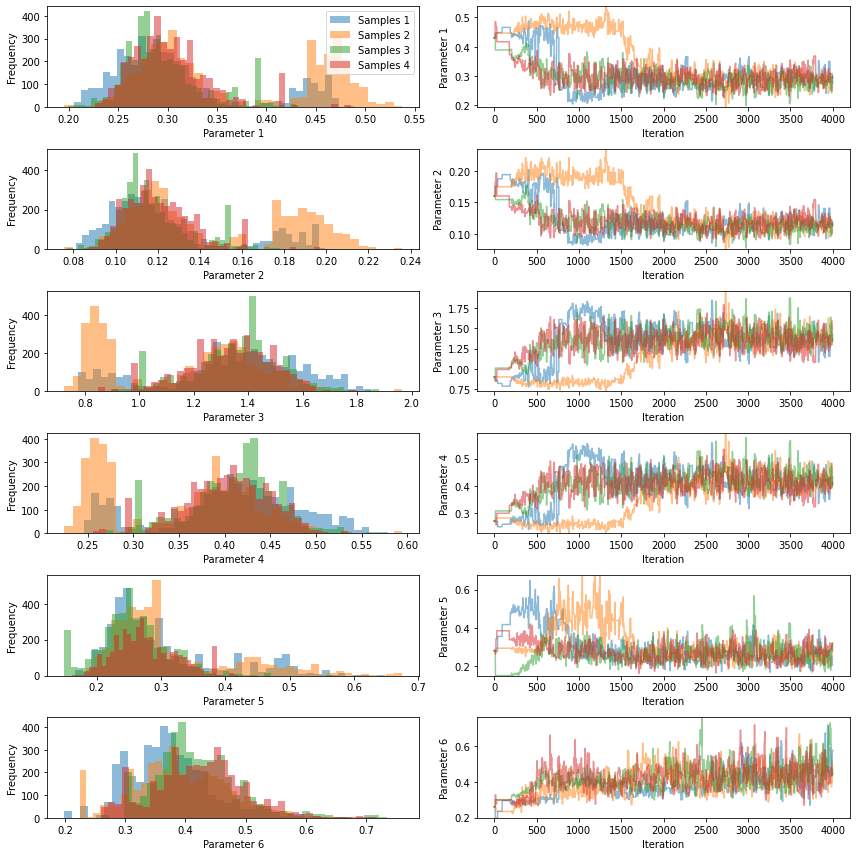

In [5]:
import pints.plot
pints.plot.trace(chains)
plt.show()

In [8]:
results = pints.MCMCSummary(chains=chains, parameter_names=["a", "b", "c", "d", "sigma_1", "sigma_2"], time=time)
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
a        0.32    0.05    0.25    0.29   0.32   0.35   0.43     1.54    23.62  0.45
b        0.13    0.02    0.10    0.12   0.13   0.14   0.18     1.56    25.11  0.48
c        1.24    0.18    0.92    1.12   1.26   1.36   1.57     1.46    23.84  0.45
d        0.38    0.05    0.28    0.34   0.38   0.41   0.48     1.46    24.49  0.46
sigma_1  0.27    0.05    0.19    0.23   0.26   0.30   0.40     1.23    52.21  0.99
sigma_2  0.41    0.08    0.26    0.37   0.41   0.46   0.57     1.05    76.69  1.45


We can also compare the predictions with these values to what we found: looks like a reasonable fit.

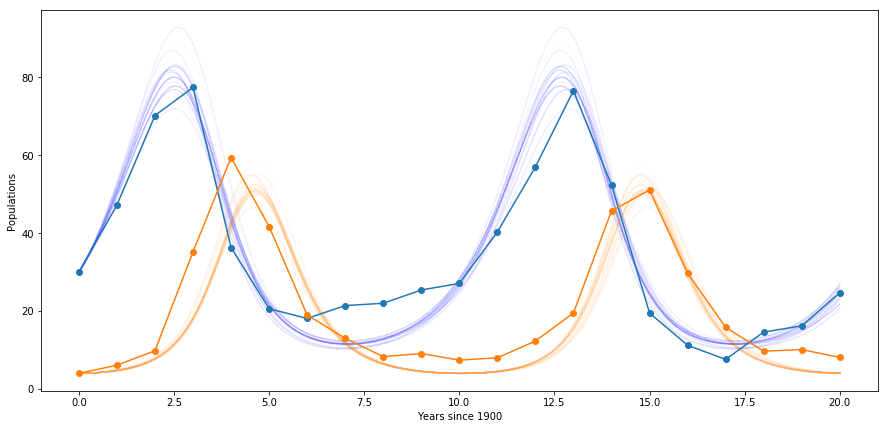

In [14]:
# Select first chain
chain1 = chains[0]

# Remove warm up period
chain1 = chain1[500:]

# Create fine-grained list of times for plotting
n_fine = 1000
times_fine = np.linspace(min(times), max(times), n_fine)

# Plot some predictions with these samples
num_lines = 100
hare = np.zeros((n_fine, num_lines))
lynx = np.zeros((n_fine, num_lines))
for i in range(num_lines):
    temp = np.exp(model.simulate(times=times_fine, parameters=chain1[i, :4]))
    hare[:, i] = temp[:, 0]
    lynx[:, i] = temp[:, 1]
plt.figure(figsize=(15, 7))
plt.xlabel('Years since 1900')
plt.ylabel('Populations')
plt.plot(times_fine, hare, color='blue', alpha=0.01)
plt.plot(times_fine, lynx, color='orange', alpha=0.01)
plt.plot(times, values, 'o-')
plt.show()

Since this is a tricky model to fit, let's use HMC to fit the same data.

In [15]:
# Run MCMC on the noisy data
x0 = [[0.43, 0.16, 0.9, 0.27, 0.28, 0.26]] * 4
mcmc = pints.MCMCController(log_posterior, 4, x0, method=pints.HamiltonianMCMC)
mcmc.set_max_iterations(200)
mcmc.set_log_interval(1)

for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size([0.1, 0.01, 0.1, 0.03, 0.05, 0.05])
    sampler.set_leapfrog_steps(10)

print('Running')
timer = pints.Timer()
chains = mcmc.run()
time = timer.time()
print('Done!')

Running
Using Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:00.1
1     44     0.333     0.333     0.333     0.333      0:01.1
2     84     0.5       0.25      0.5       0.5        0:02.1
3     124    0.4       0.4       0.6       0.6        0:03.0
4     164    0.5       0.5       0.667     0.667      0:04.1
5     204    0.571     0.571     0.714     0.571      0:05.1
6     244    0.5       0.625     0.625     0.625      0:06.1
7     284    0.556     0.556     0.667     0.667      0:07.2
8     324    0.5       0.6       0.7       0.7        0:08.2
9     364    0.455     0.636     0.636     0.727      0:09.1
10    404    0.417     0.667     0.667     0.75       0:10.1
11    444    0.462     0.692     0.692     0.769      0:11.2
12    484    0.429     0.643     0.714     0.786      0:12.2
13    524    0.467     0.667     0.667     0.8        0:13.

132   5284   0.463     0.448     0.336     0.575      2:13.3
133   5324   0.459     0.444     0.341     0.578      2:14.3
134   5364   0.456     0.441     0.338     0.581      2:15.2
135   5404   0.453     0.445     0.336     0.577      2:16.2
136   5444   0.449     0.442029  0.341     0.572      2:17.1
137   5484   0.446     0.439     0.345     0.576      2:18.0
138   5524   0.443     0.436     0.343     0.579      2:18.9
139   5564   0.447     0.433     0.34      0.582      2:19.8
140   5604   0.443662  0.43      0.338     0.577      2:20.8
141   5644   0.448     0.434     0.336     0.573      2:21.8
142   5684   0.451     0.4375    0.34      0.569      2:22.6
143   5724   0.455     0.434     0.337931  0.566      2:23.6
144   5764   0.459     0.432     0.336     0.568      2:24.5
145   5804   0.462585  0.429     0.333     0.571      2:25.5
146   5844   0.466     0.426     0.331     0.568      2:26.4
147   5884   0.463     0.423     0.329     0.564      2:27.4
148   5924   0.46      0

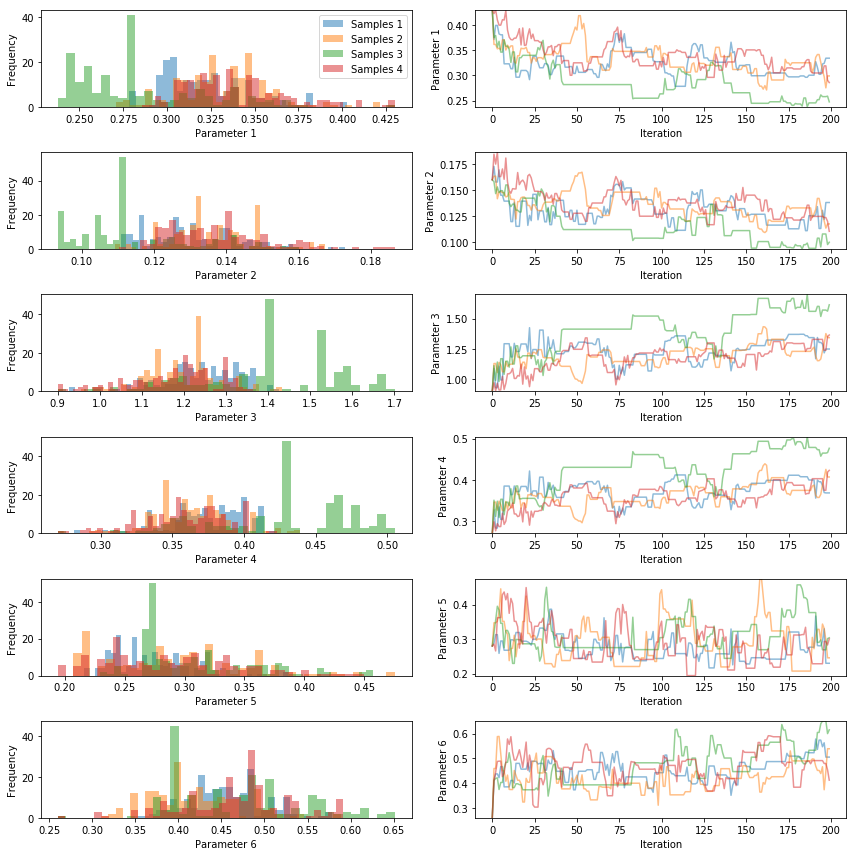

In [16]:
import pints.plot
pints.plot.trace(chains)
plt.show()

We get similar results as with adaptive covariance; except, the efficiency suffers due to having to calculate the sensitivities. Overall, for this problem, adaptive covariance performs favourably.

In [17]:
results = pints.MCMCSummary(chains=chains, parameter_names=["a", "b", "c", "d", "sigma_1", "sigma_2"], time=time)
print(results)

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess    ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  -----  --------------
a        0.32    0.04    0.25    0.30   0.32   0.34   0.39     1.43    36.71  0.18
b        0.13    0.02    0.09    0.12   0.13   0.14   0.16     1.39    37.80  0.19
c        1.25    0.15    0.99    1.16   1.23   1.33   1.59     1.48    36.05  0.18
d        0.38    0.04    0.30    0.35   0.37   0.40   0.48     1.51    36.63  0.18
sigma_1  0.29    0.05    0.21    0.25   0.28   0.32   0.42     1.09    64.14  0.32
sigma_2  0.45    0.06    0.35    0.40   0.45   0.49   0.59     1.22    47.76  0.24
